# 회귀분석

## 1. 다중선형회귀
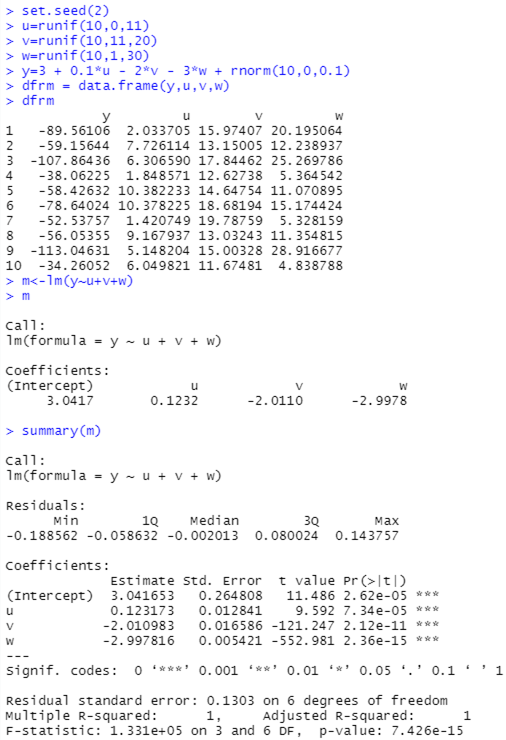

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [2]:
np.random.seed(2)
u = np.random.rand(10) * 11        # 0 ~ 11
v = (np.random.rand(10) * 11) + 11 # 11 ~ 22
w = (np.random.rand(10) * 29) + 1  # 1 ~ 30
y = 3 + 0.1*u + 2*v - 3*w + np.random.rand(10) * 0.1

data = {'y':y, 'u':u, 'v':v, 'w':w}
df = pd.DataFrame(data)
df

,y,u,v,w
0,-7.765092,4.795944,17.832472,15.652137
1,28.009893,0.285189,16.820563,2.893309
2,-11.617214,6.046287,12.480379,13.415548
3,25.427691,4.788546,16.649359,3.799397
4,15.507688,4.624046,13.028839,4.687639
5,-12.237411,3.633683,19.638687,18.305614
6,21.428890,2.251135,20.393728,7.554348
7,24.308134,6.811981,16.436605,4.101425
8,21.803563,3.296201,20.312176,7.388880
9,-6.319101,2.935100,11.876100,11.144962


In [5]:
# 상수항 추가
X = sm.add_constant(df[['u','v','w']])

# OLS 검정
multi_model = sm.OLS(df[['y']], X)
fitted_multi_model = multi_model.fit()
fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.780e+06
Date:                Sun, 27 Dec 2020   Prob (F-statistic):           3.10e-18
Time:                        15:45:43   Log-Likelihood:                 26.482
No. Observations:                  10   AIC:                            -44.96
Df Residuals:                       6   BIC:                            -43.75
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0694      0.048     63.601      0.000       2.951       3.187
u              0.1023      0.004     24.656      0.000       0.092       0.112
v              1.9980      0.002    815.885      0.000       1.992       2.004
w             -2.9995      0.001  -2170.504      0.000      -3.003      -2.996
==============================================================================
Omnibus:                        7.802   Durbin-Watson:                   2.221
Prob(Omnibus):                  0.020   Jarque-Bera (JB):                3.012
Skew:                           1.194   Prob(JB):                        0.222
Kurtosis:                       4.237   Cond. No.                         135.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 2. 식이요법을 적용한 닭 데이터
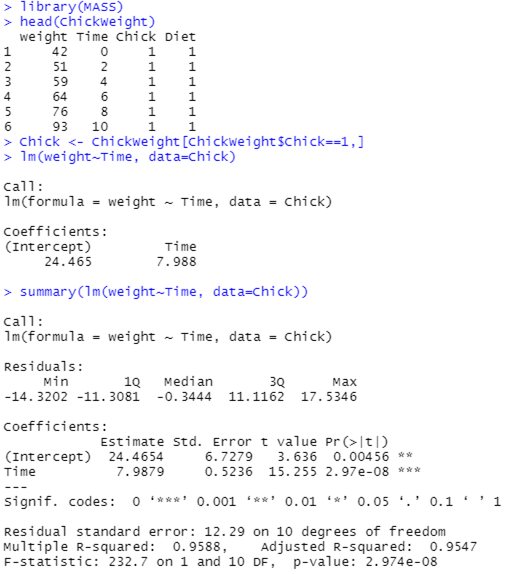

In [6]:
ChickWeight = pd.read_csv('ChickWeight.csv')
ChickWeight.head()

,weight,Time,Chick,Diet
0,42,0,1,1
1,51,2,1,1
2,59,4,1,1
3,64,6,1,1
4,76,8,1,1


In [7]:
Chick = ChickWeight[ChickWeight['Chick']==1]

In [8]:
import statsmodels.formula.api as smf

result = smf.ols(formula='weight ~ Time', data=Chick).fit()
result.summary()

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     232.7
Date:                Sun, 27 Dec 2020   Prob (F-statistic):           2.97e-08
Time:                        16:01:20   Log-Likelihood:                -46.039
No. Observations:                  12   AIC:                             96.08
Df Residuals:                      10   BIC:                             97.05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     24.4654      6.728      3.636      0.005       9.475      39.456
Time           7.9879      0.524     15.255      0.000       6.821       9.155
==============================================================================
Omnibus:                        3.840   Durbin-Watson:                   0.342
Prob(Omnibus):                  0.147   Jarque-Bera (JB):                1.217
Skew:                           0.211   Prob(JB):                        0.544
Kurtosis:                       1.498   Cond. No.                         24.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""